In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io.votable import parse
from scipy import stats
import seaborn as sns

In [2]:
gaia_fit1 = fits.open('gaia3_24_7-result.fits')

In [3]:
gaia_fit1.info()

Filename: gaia3_24_7-result.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  votable       1 BinTableHDU     31   57638R x 4C   [E, E, E, K]   


In [4]:
gaia_fit1[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'pseudocolour'; format = 'E'; unit = 'um**-1'
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
)

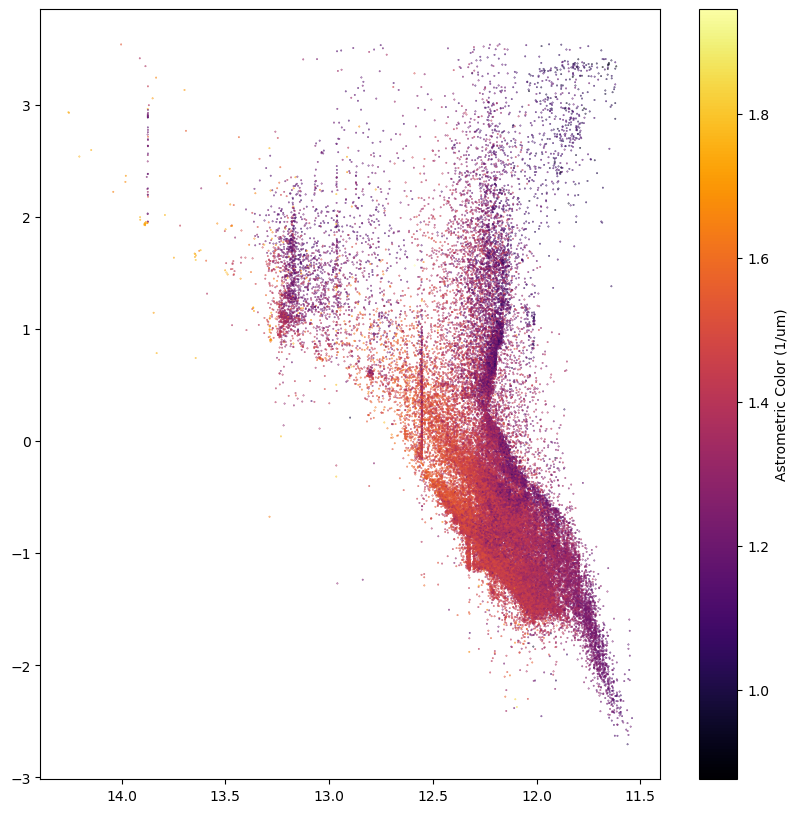

In [5]:
gaiatable1 = gaia_fit1[1].data

color = gaiatable1['pseudocolour']

plt.figure(figsize=(10,10))
plt.scatter(np.log2(gaiatable1['teff_gspphot']), np.log10(gaiatable1['lum_flame']), s=0.1, c=color, cmap='inferno')
plt.colorbar(label="Astrometric Color (1/um)")
plt.gca().invert_xaxis()

In [6]:
gaia_fit2 = fits.open('gaia4_1_1-result.fits')

In [7]:
gaia_fit2.info()

Filename: gaia4_1_1-result.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  votable       1 BinTableHDU     36   776073R x 5C   [E, D, D, E, K]   


In [8]:
gaia_fit2[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'phot_rp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'phot_bp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
)

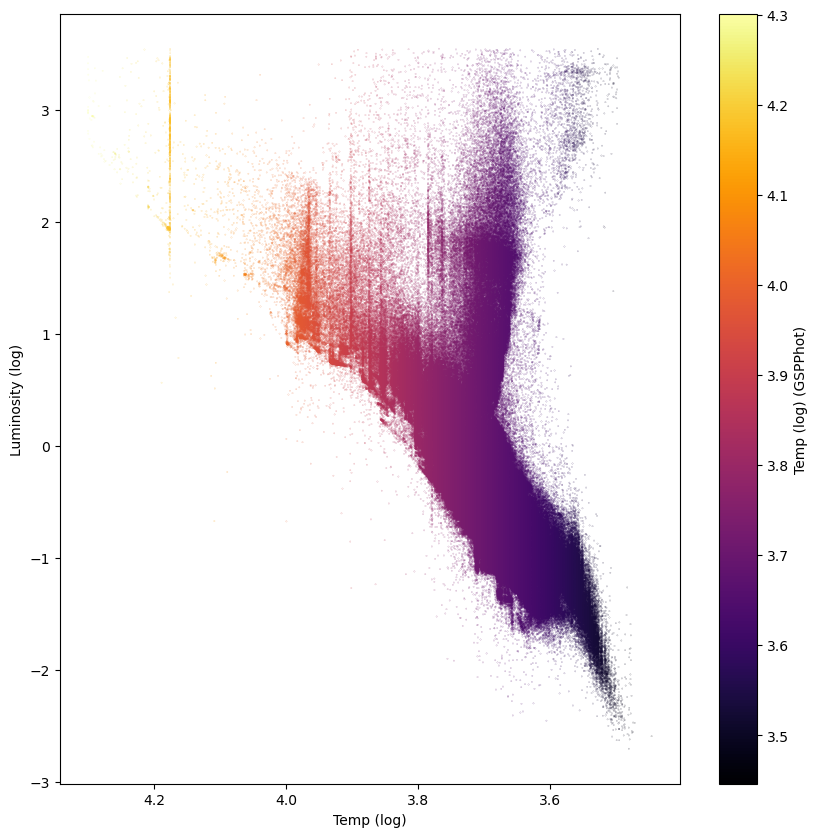

In [9]:
gaiatable2 = gaia_fit2[1].data

temp = gaiatable2['teff_gspphot']
rp = gaiatable2['phot_rp_mean_flux']
bp = gaiatable2['phot_bp_mean_flux']
lum = gaiatable2['lum_flame']

x = np.log10(temp)
y = np.log10(lum)
color = np.log10(temp)

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=0.01, c=color, cmap='inferno')
plt.colorbar(label='Temp (log) (GSPPhot)')
plt.xlabel('Temp (log)')
plt.ylabel('Luminosity (log)')
plt.gca().invert_xaxis()

In [10]:
gaia_fit3 = fits.open('gaia4_2_3-result.fits')

In [11]:
gaia_fit3.info()

Filename: gaia4_2_3-result.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  votable       1 BinTableHDU     46   77967R x 7C   [E, D, D, E, K, E, E]   


In [12]:
gaia_fit3[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'phot_rp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'phot_bp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
)

Text(0, 0.5, 'Lum (log10)')

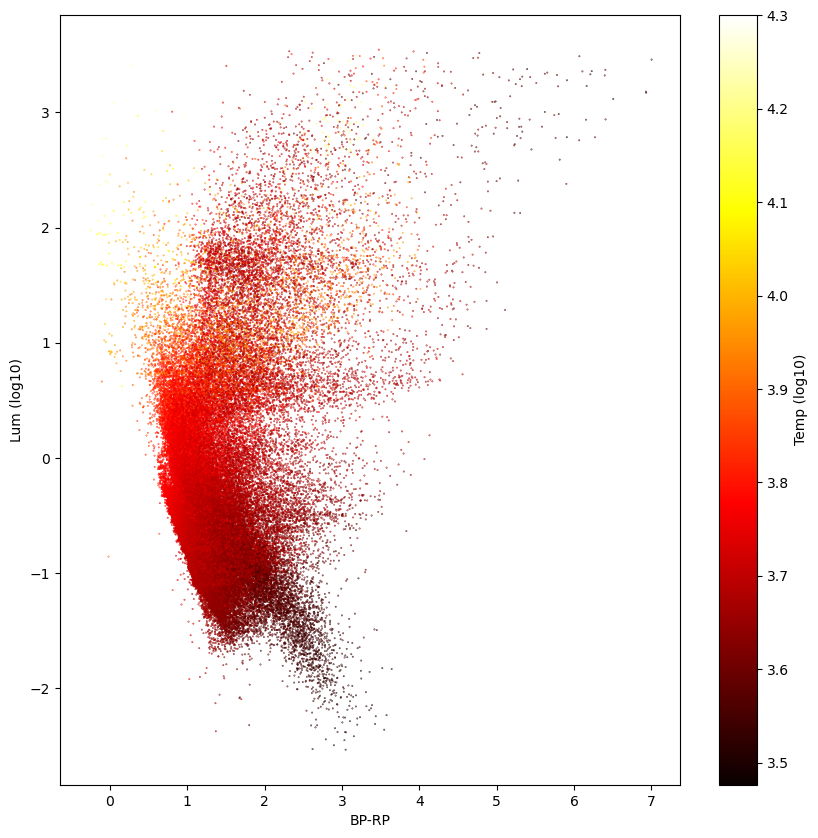

In [13]:
gaiatable3 = gaia_fit3[1].data

temp3 = gaiatable3['teff_gspphot']
rp3 = gaiatable3['phot_rp_mean_flux']
bp3 = gaiatable3['phot_bp_mean_flux']
lum3 = gaiatable3['lum_flame']
mag3 = gaiatable3['phot_g_mean_mag']
bprp3 = gaiatable3['bp_rp']

x = bprp3
y = np.log10(lum3)
color = np.log10(temp3)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=color, s=0.1, cmap='hot')
plt.colorbar(label='Temp (log10)')
plt.xlabel('BP-RP')
plt.ylabel('Lum (log10)')

In [3]:
gaia_fit4 = fits.open('gaia4_2_4-result.fits')
gaia_fit4[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'phot_rp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'phot_bp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
)

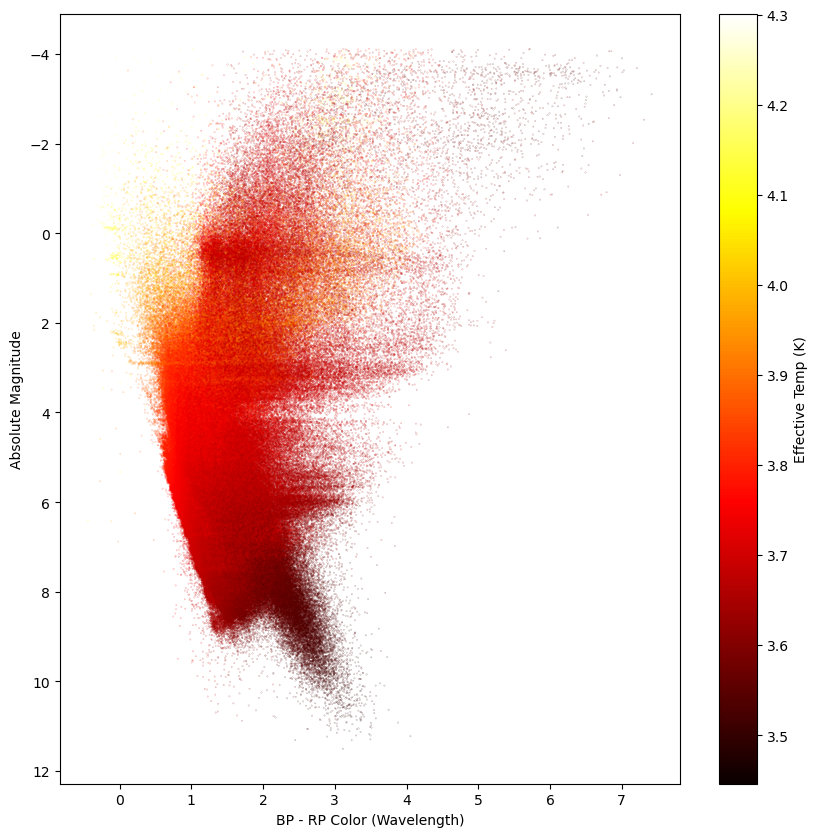

In [4]:
gaiatable4 = gaia_fit4[1].data

temp4 = gaiatable4['teff_gspphot']
rp4 = gaiatable4['phot_rp_mean_flux']
bp4 = gaiatable4['phot_bp_mean_flux']
lum4 = gaiatable4['lum_flame']
mag4 = gaiatable4['phot_g_mean_mag']
bprp4 = gaiatable4['bp_rp']
absmag4 = -2.5 * np.log10(lum4/79)

x = bprp4
y = absmag4
color = np.log10(temp4)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=color, cmap='hot', s=0.01)
plt.colorbar(label='Effective Temp (K)')
plt.xlabel('BP - RP Color (Wavelength)')
plt.ylabel('Absolute Magnitude')
plt.gca().invert_yaxis()

Text(0, 0.5, 'Luminosity (solLum)')

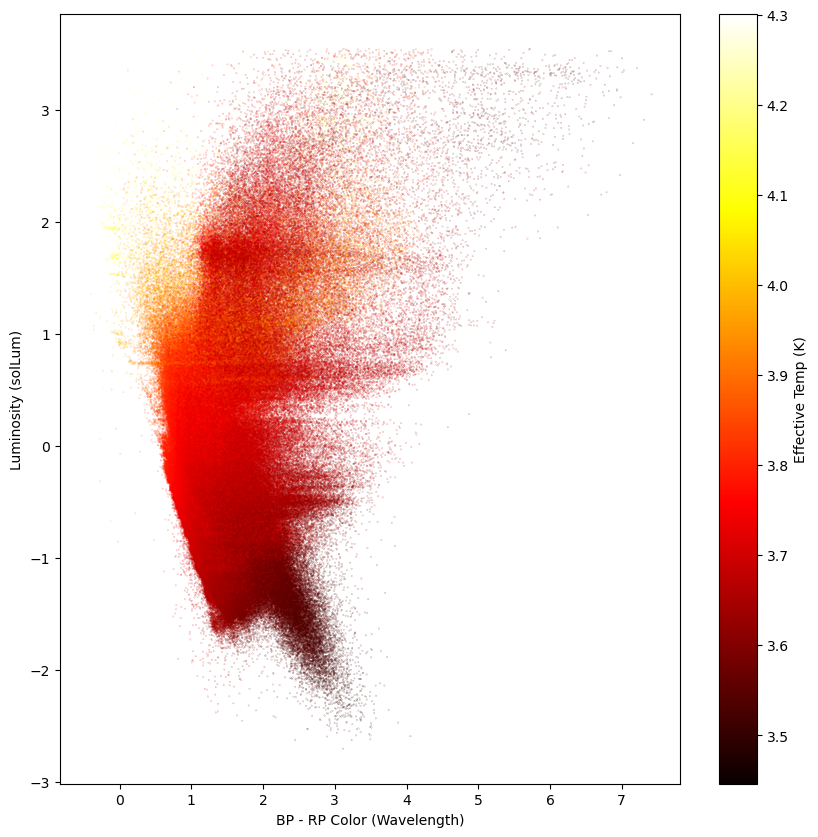

In [5]:
x = bprp4
y = np.log10(lum4)
color = np.log10(temp4)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=color, cmap='hot', s=0.01)
plt.colorbar(label='Effective Temp (K)')
plt.xlabel('BP - RP Color (Wavelength)')
plt.ylabel('Luminosity (solLum)')

In [2]:
gaia_fit5 = fits.open('gaia4_2_5-result.fits')
gaia_fit5[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'phot_rp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'phot_bp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
    name = 'classprob_dsc_combmod_galaxy'; format = 'E'
    name = 'classprob_dsc_combmod_star'; format = 'E'
    name = 'classprob_dsc_combmod_whitedwarf'; format = 'E'
    name = 'classprob_dsc_combmod_quasar'; format = 'E'
)

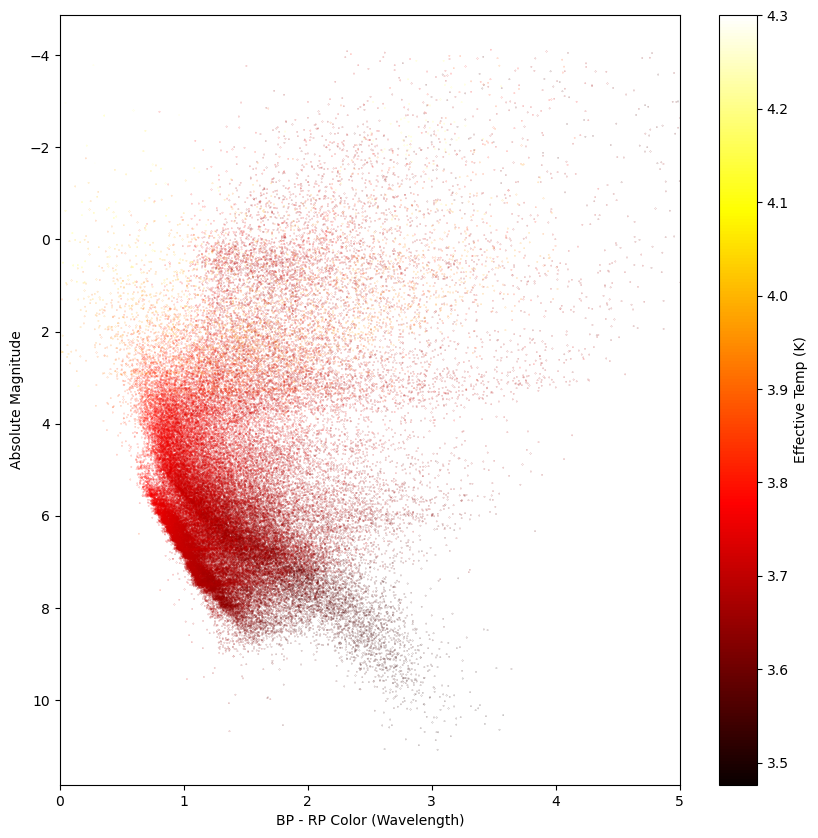

In [3]:
gaiatable5 = gaia_fit5[1].data

temp = gaiatable5['teff_gspphot']
rp = gaiatable5['phot_rp_mean_flux']
bp = gaiatable5['phot_bp_mean_flux']
lum = gaiatable5['lum_flame']
mag = gaiatable5['phot_g_mean_mag']
bprp = gaiatable5['bp_rp']

absmag = -2.5 * np.log10(lum/79)

x = bprp
y = absmag
color = np.log10(temp)

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=color, cmap='hot', s=0.01)
plt.colorbar(label='Effective Temp (K)')
plt.xlabel('BP - RP Color (Wavelength)')
plt.ylabel('Absolute Magnitude')
plt.xlim(0, 5)
plt.gca().invert_yaxis()

Text(0.5, 0, 'Log of Temperature')

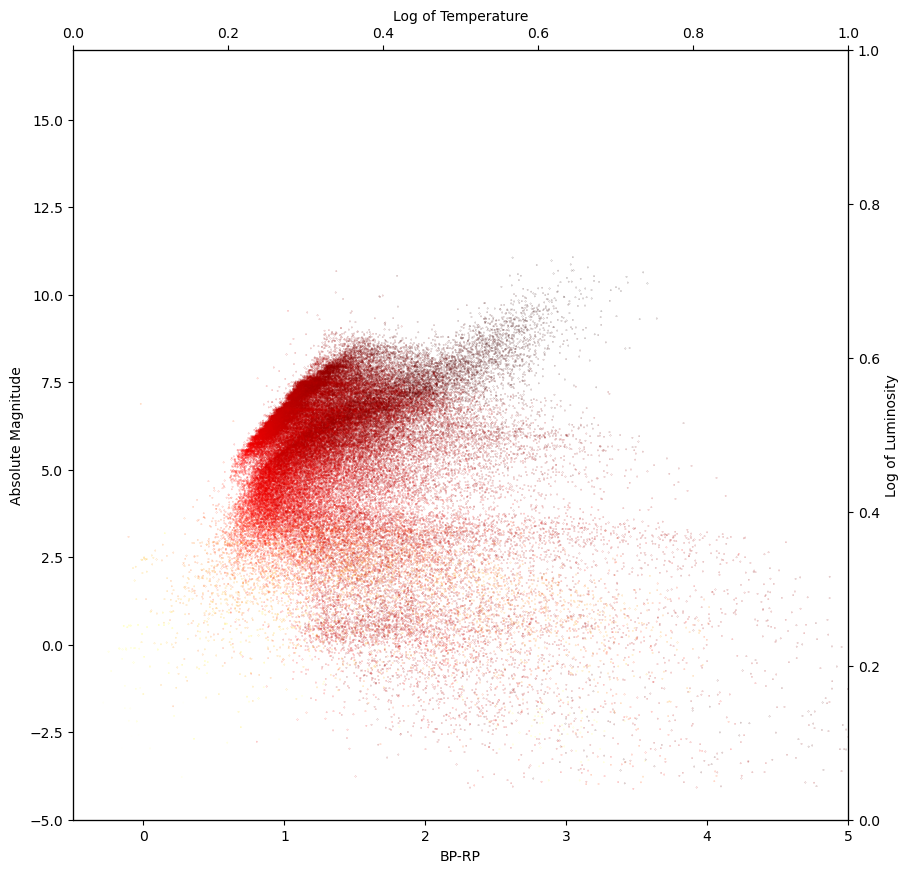

In [8]:
plt.figure(figsize=(10,10))

x1 = bprp
x2 = np.log10(temp)
y1 = absmag
y2 = np.log10(lum)

plt.xlabel('BP-RP')
plt.ylabel('Absolute Magnitude')
plt.scatter(x1, y1, c=color, s=0.01, cmap='hot')
plt.axis([-0.5, 5, -5, 17])
plt.twinx()
plt.ylabel('Log of Luminosity')
plt.twiny()
plt.xlabel('Log of Temperature')

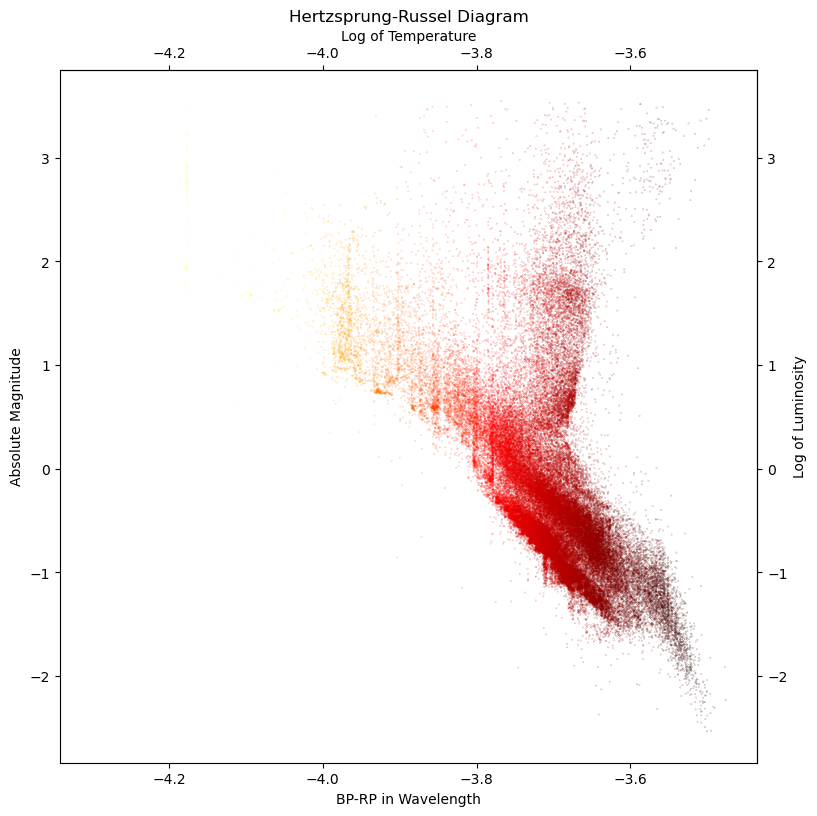

In [9]:
fig, ax = plt.subplots(figsize=(9,9))
x = -np.log10(temp)
y = np.log10(lum)
ax.scatter(x, y, c=color, cmap='hot', s=0.01)
ax.set_xlabel('BP-RP in Wavelength')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Hertzsprung-Russel Diagram')

secxax = ax.secondary_xaxis('top')
secxax.set_xlabel('Log of Temperature')
secyax = ax.secondary_yaxis('right')
secyax.set_ylabel('Log of Luminosity')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

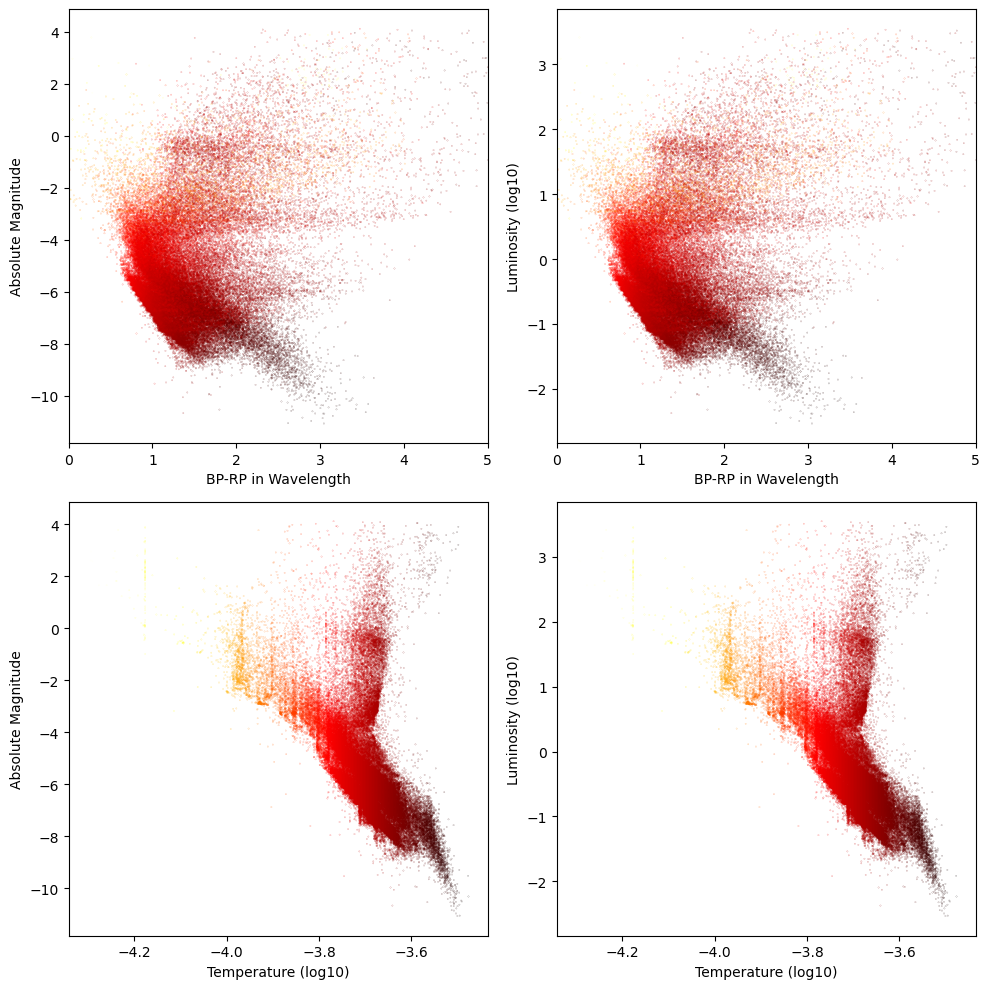

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, -absmag, c=color, cmap='hot', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_xlim(0, 5)
axs[0,0].set_ylabel('Absolute Magnitude')

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='hot', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_xlim(0, 5)
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(-np.log10(temp), -absmag, c=color, cmap='hot', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')

axs[1,1].scatter(-np.log10(temp), np.log10(lum), c=color, cmap='hot', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')

plt.tight_layout()
plt.show

In [11]:
gaia_fit6 = fits.open('gaia4_8_1-result.fits')
gaia_fit6[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'phot_rp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'phot_bp_mean_flux'; format = 'D'; unit = "'electron'.s**-1"
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
    name = 'phot_g_mean_mag'; format = 'E'; unit = 'mag'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
    name = 'distance_gspphot'; format = 'E'; unit = 'pc'
)

In [12]:
gaia_fit7 = fits.open('gaia4_8_2-result.fits')
gaia_fit7[1].columns

ColDefs(
    name = 'teff_gspphot'; format = 'E'; unit = 'K'
    name = 'lum_flame'; format = 'E'; unit = 'solLum'
    name = 'random_index'; format = 'K'
    name = 'bp_rp'; format = 'E'; unit = 'mag'
    name = 'distance_gspphot'; format = 'E'; unit = 'pc'
    name = 'mg_gspphot'; format = 'E'; unit = 'mag'
)

In [13]:
gaiatable7 = gaia_fit7[1].data

In [16]:
temp = gaiatable7['teff_gspphot']
lum = gaiatable7['lum_flame']
bprp = gaiatable7['bp_rp']
distance = gaiatable7['distance_gspphot']
absmag = gaiatable7['mg_gspphot']
color = temp

<function matplotlib.pyplot.show(close=None, block=None)>

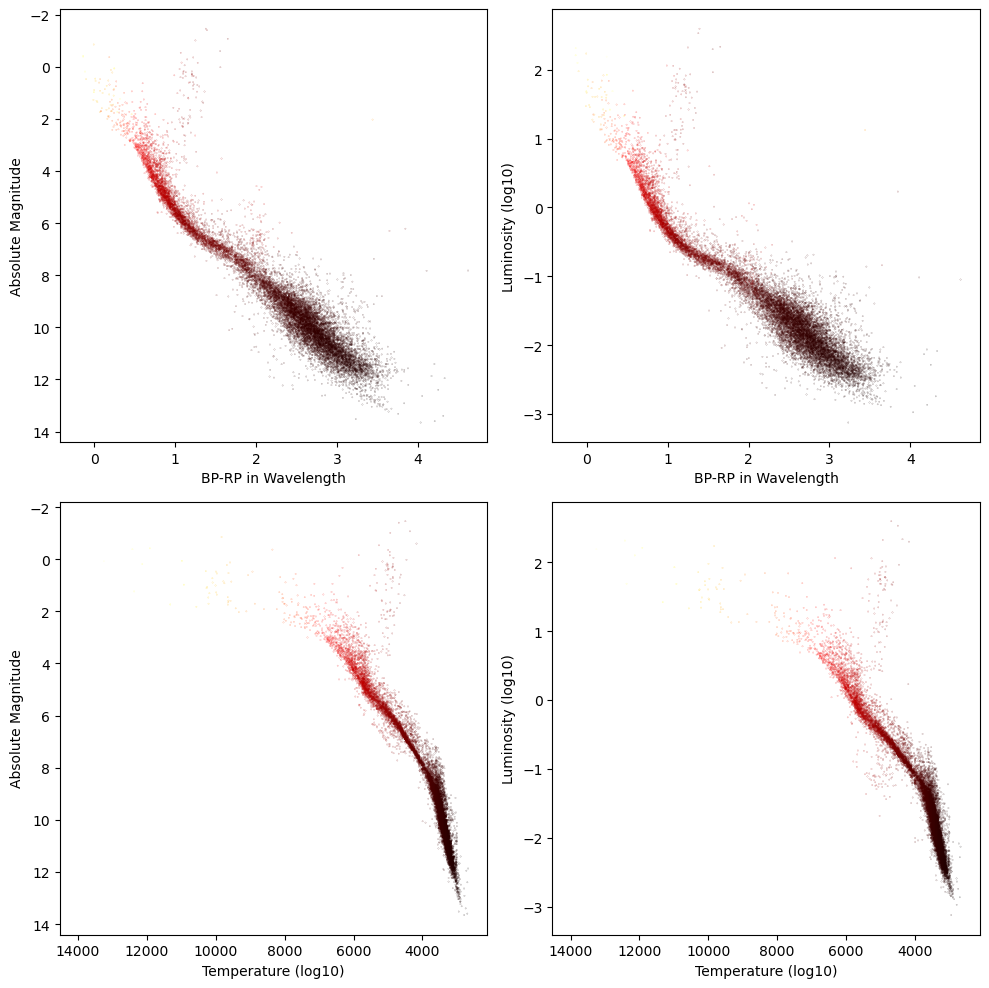

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='hot', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='hot', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(temp, absmag, c=color, cmap='hot', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(temp, np.log10(lum), c=color, cmap='hot', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [2]:
gaia_fit8 = fits.open('gaia4_8_7-result.fits')
gaiatable8 = gaia_fit8[1].data

In [3]:
temp = gaiatable8['teff_gspphot']
lum = gaiatable8['lum_flame']
bprp = gaiatable8['bp_rp']
absmag = gaiatable8['mg_gspphot']
color = np.log10(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

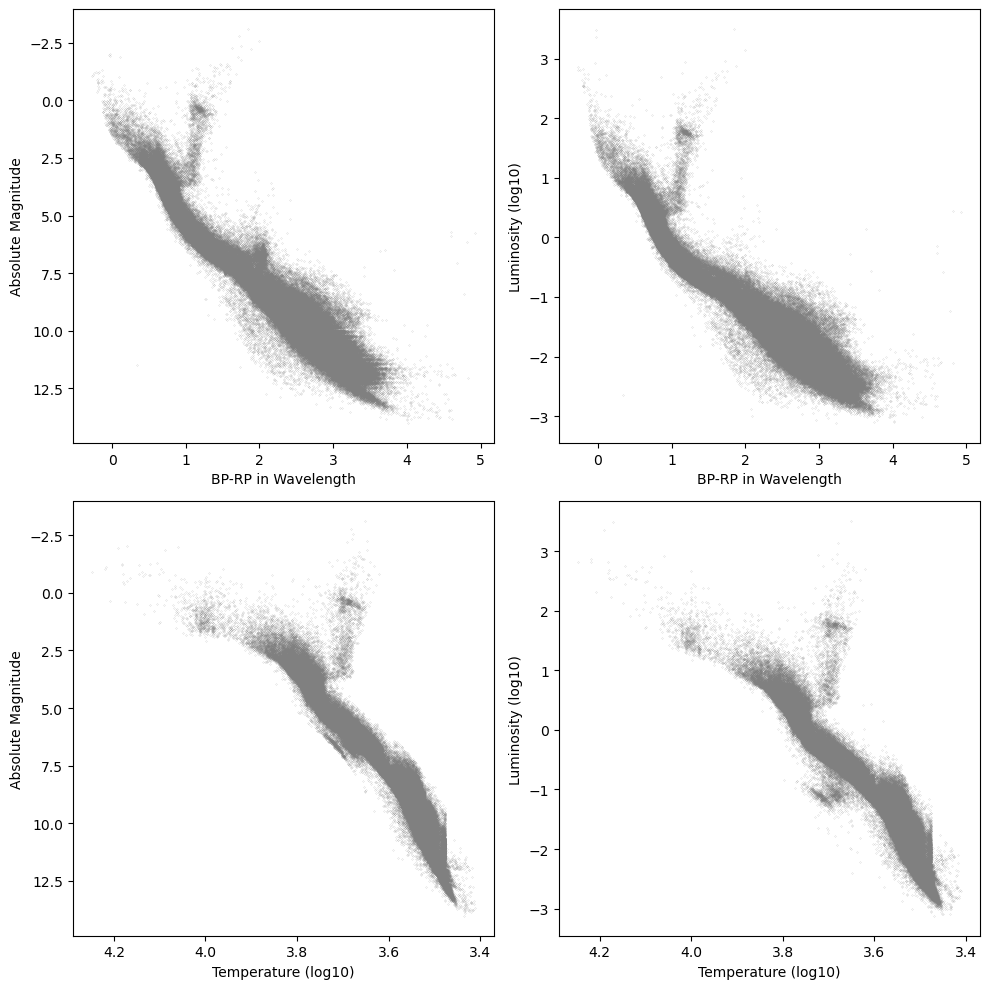

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c='grey', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c='grey', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c='grey', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c='grey', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [19]:
gaia_fit = fits.open('gaia4_8_9-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

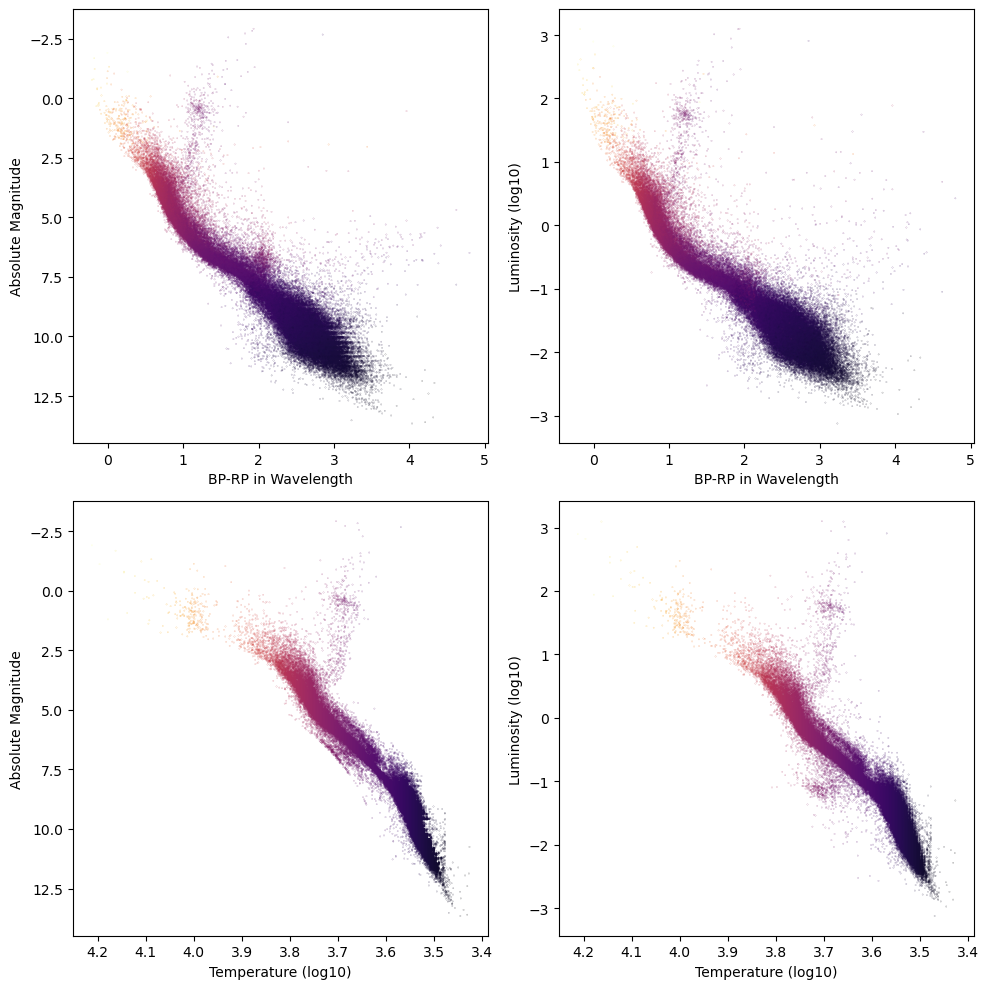

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c=color, cmap='inferno', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [24]:
gaia_fit = fits.open('gaia4_8_11-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

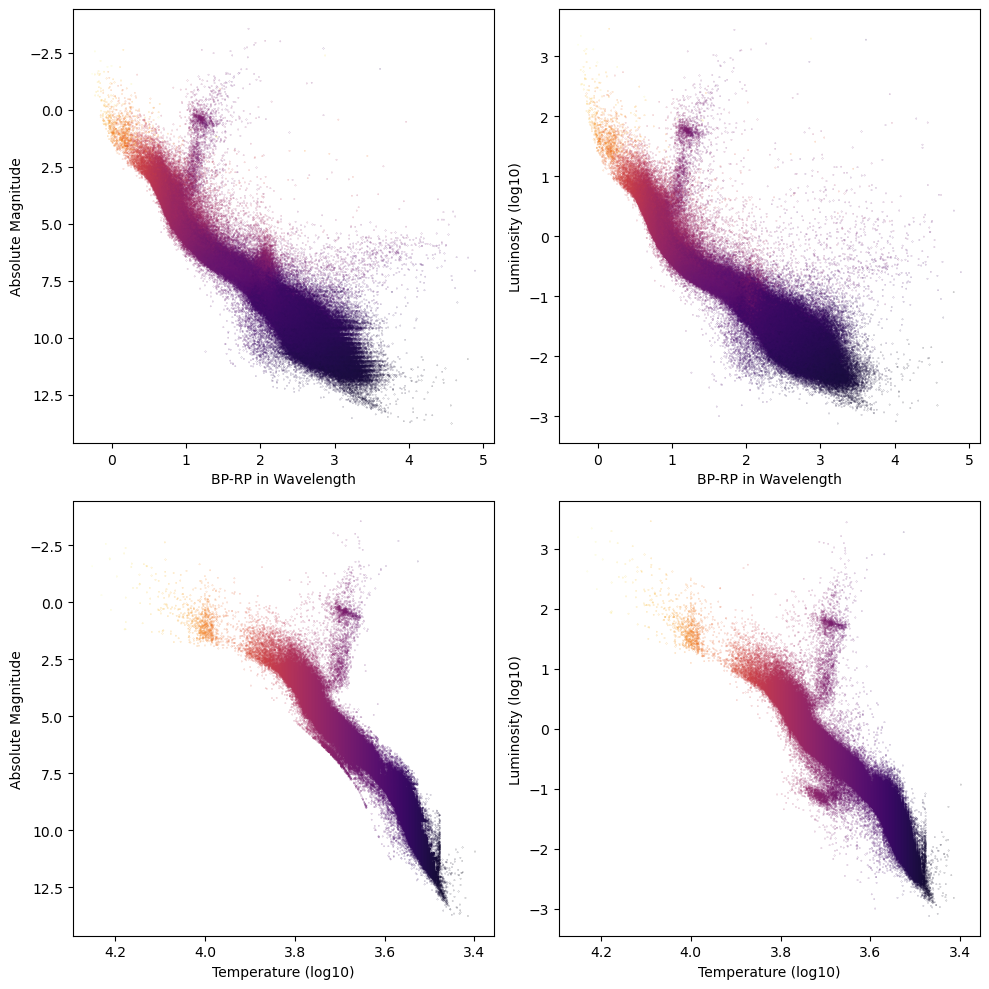

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c=color, cmap='inferno', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [26]:
gaia_fit = fits.open('gaia4_8_12-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

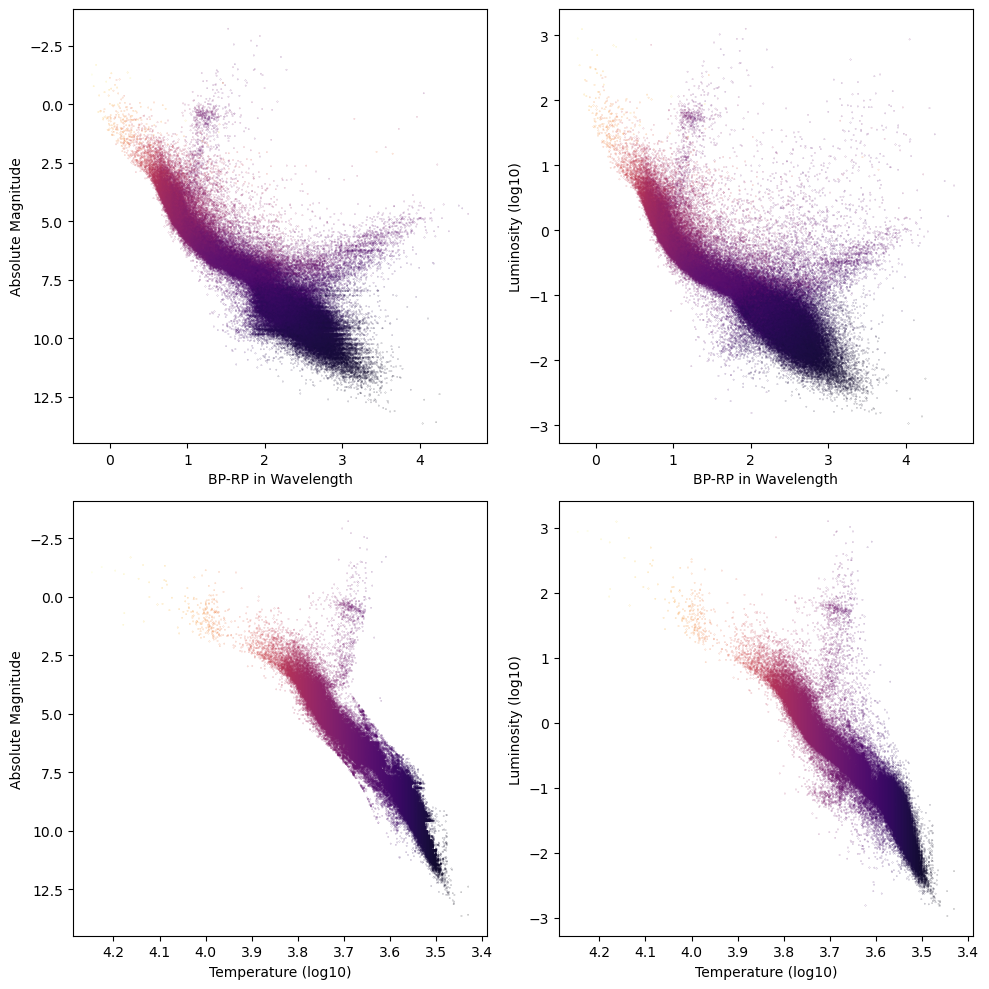

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c=color, cmap='inferno', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [7]:
gaia_fit = fits.open('gaia4_8_15-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c=color, cmap='inferno', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [2]:
gaia_fit = fits.open('gaia4_8_16-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

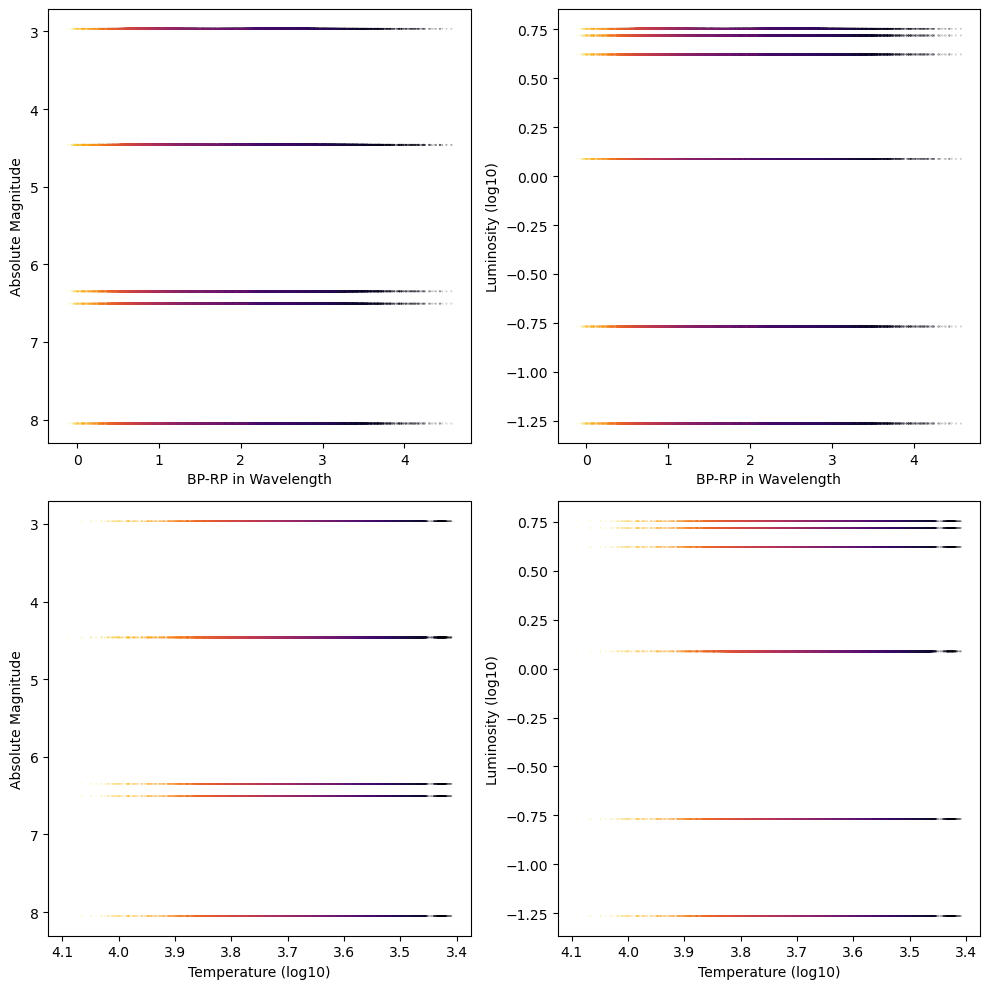

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c=color, cmap='inferno', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [22]:
gaia_fit = fits.open('gaia4_9_4-result.fits')
gaiatable = gaia_fit[1].data

In [23]:
temp = gaiatable['teff_gspphot']
# lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)
absmag2 = -2.5 * np.log10(lum/79)

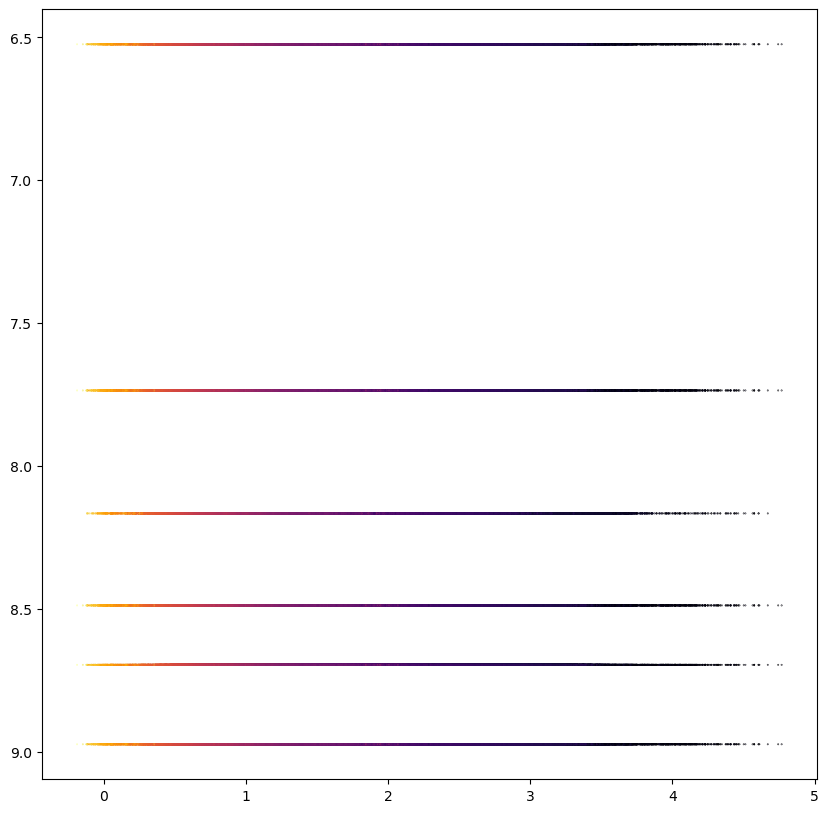

In [24]:
fig, axs = plt.subplots(figsize=(10,10))

axs.invert_yaxis()
axs.scatter(bprp, absmag, cmap='inferno', c=color, s=0.1)

In [25]:
gaia_fit = fits.open('gaia4_8_7-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

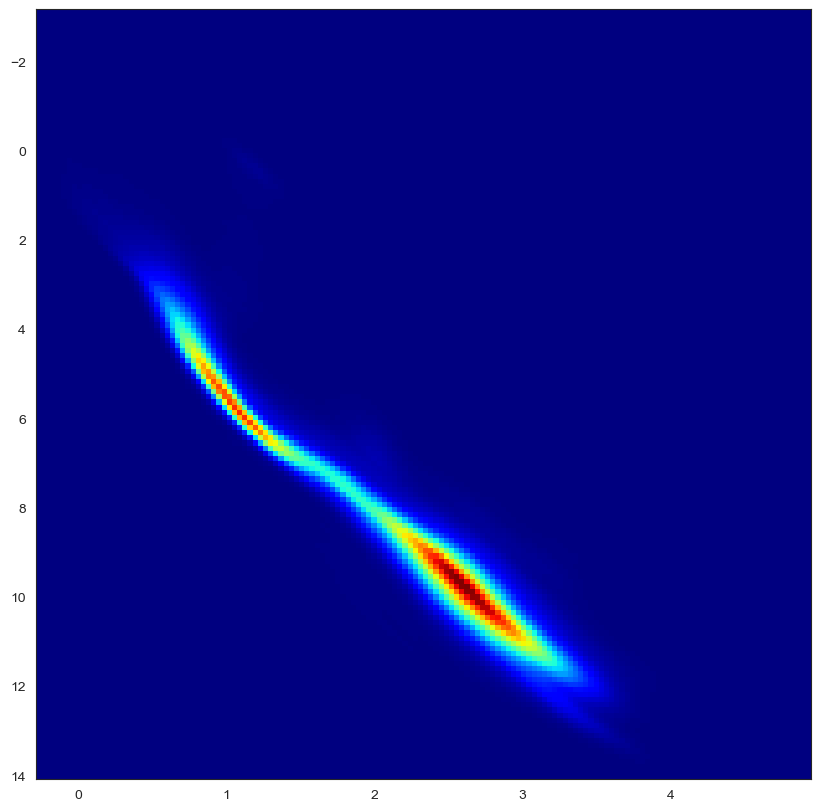

In [44]:
x = bprp
y = absmag
 
# evaluating a gaussian kde on a regular grid of nbins by nbins over data extents
nbins=150
k = stats.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig, axs = plt.subplots(figsize=(10,10))
axs.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='jet', vmin=0)
axs.invert_yaxis()
plt.show()

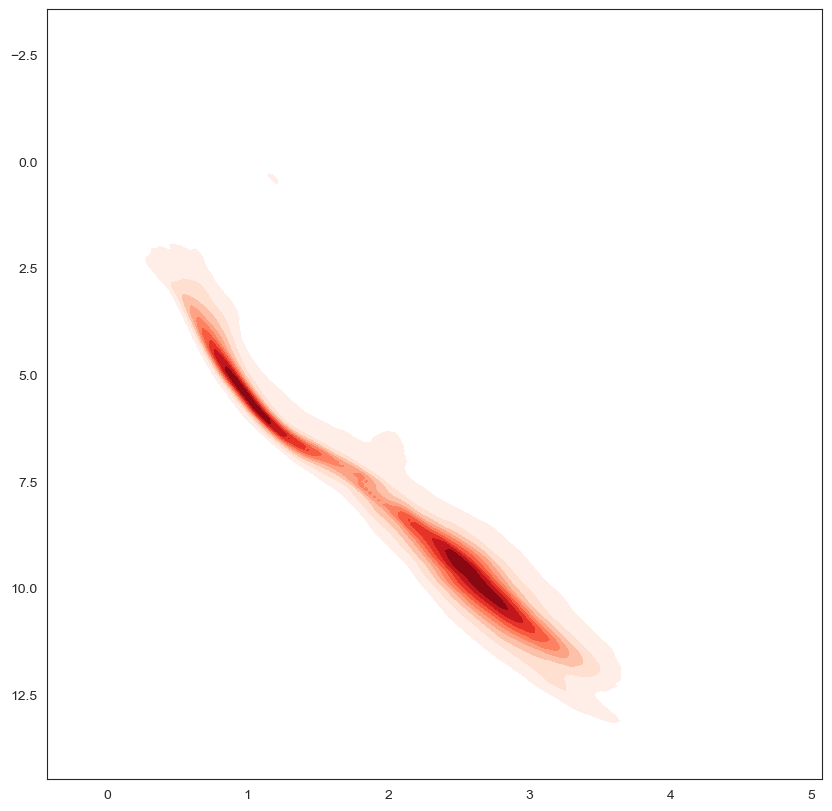

In [48]:
fig, axs = plt.subplots(figsize=(10,10))
sns.set_style('white')
sns.kdeplot(x=bprp, y=absmag, cmap='Reds', fill=True, bw_adjust=0.5)
axs.invert_yaxis()
plt.show()

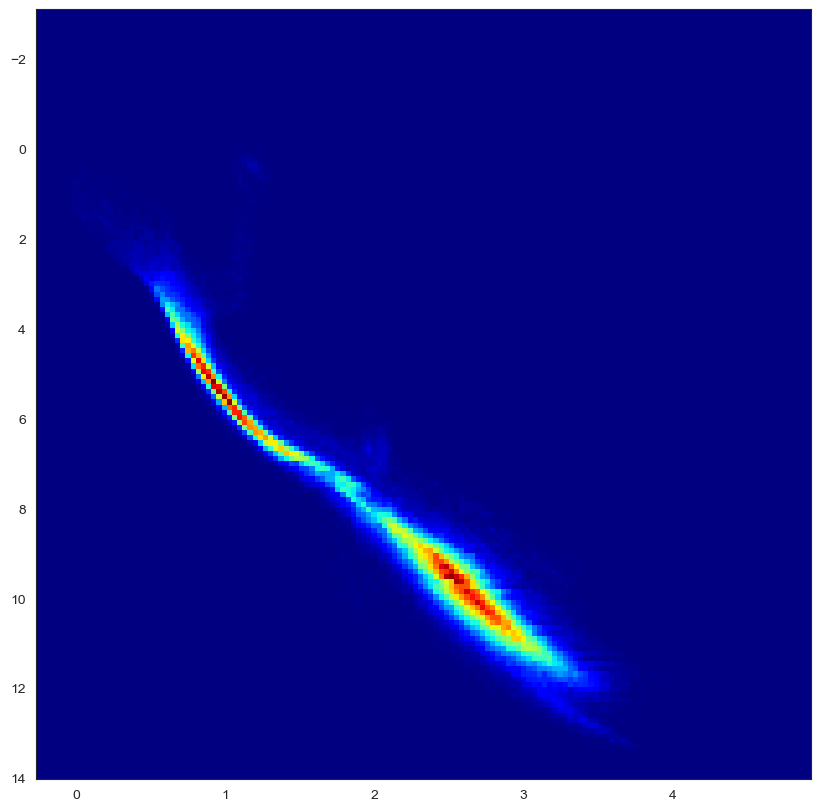

In [47]:
fig, axs = plt.subplots(figsize=(10,10))
axs.hist2d(x, y, bins=(150, 150), cmap='jet')
axs.invert_yaxis()
plt.show()

In [3]:
gaia_fit = fits.open('gaia4_22_2-result.fits')
gaiatable = gaia_fit[1].data

In [5]:
temp = gaiatable['teff_gspphot']
bprp = gaiatable['bp_rp']
absmag = gaiatable['g_mag_abs']
color = np.log10(temp)

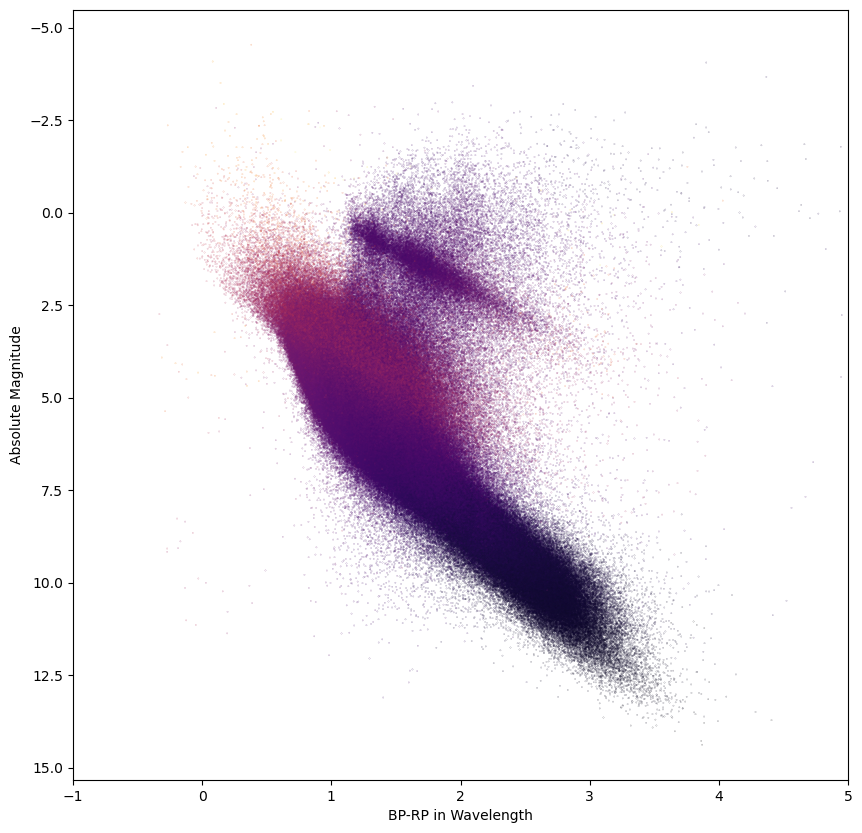

In [15]:
fig, axs = plt.subplots(figsize=(10,10))

axs.scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs.set_xlim(-1, 5)
axs.set_xlabel('BP-RP in Wavelength')
axs.set_ylabel('Absolute Magnitude')
axs.invert_yaxis()

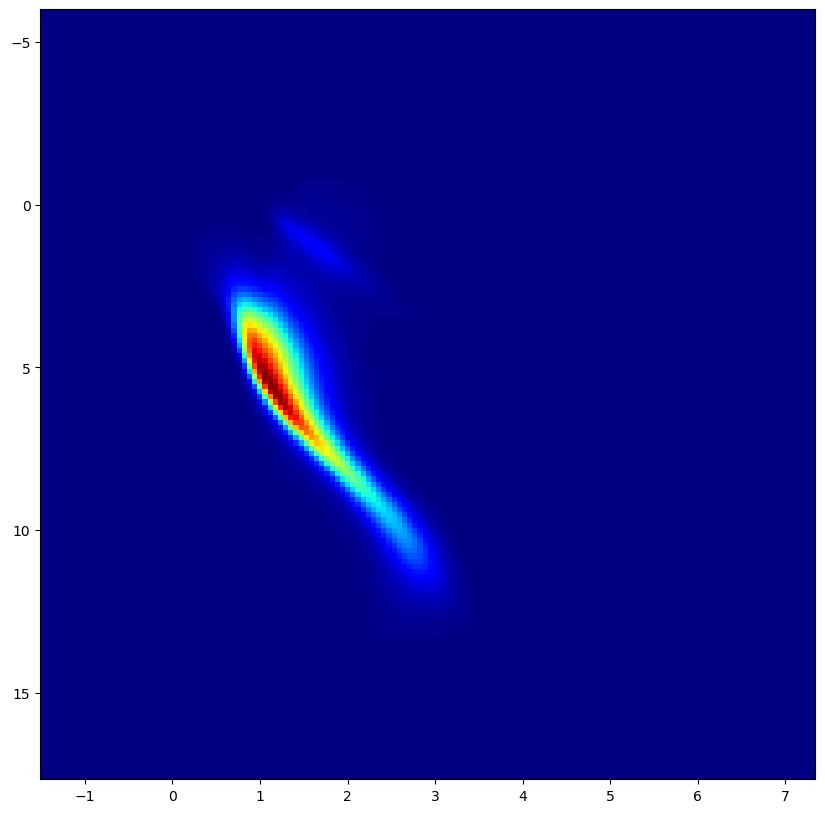

In [16]:
x = bprp
y = absmag
 
# evaluating a gaussian kde on a regular grid of nbins by nbins over data extents
nbins=150
k = stats.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig, axs = plt.subplots(figsize=(10,10))
axs.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='jet', vmin=0)
axs.invert_yaxis()
plt.show()

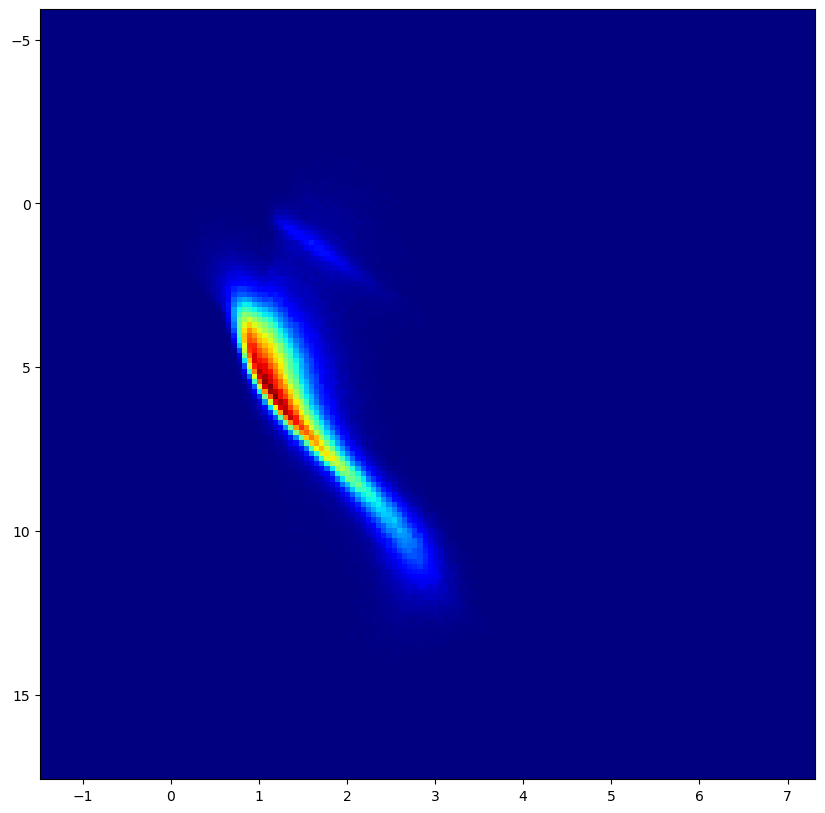

In [17]:
fig, axs = plt.subplots(figsize=(10,10))
axs.hist2d(x, y, bins=(150, 150), cmap='jet')
axs.invert_yaxis()
plt.show()

In [2]:
gaia_fit = fits.open('gaia4_22_4-result.fits')
gaiatable = gaia_fit[1].data

In [3]:
temp = gaiatable['teff_gspphot']
bprp = gaiatable['bp_rp']
absmag = gaiatable['g_mag_abs']
color = np.log10(temp)

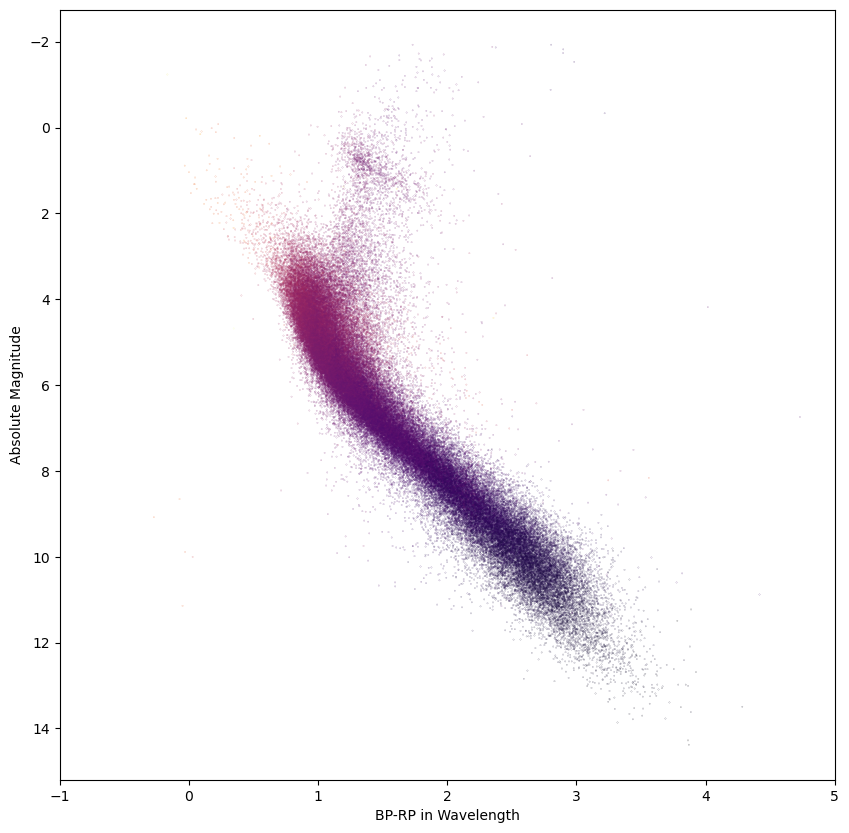

In [4]:
fig, axs = plt.subplots(figsize=(10,10))

axs.scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs.set_xlim(-1, 5)
axs.set_xlabel('BP-RP in Wavelength')
axs.set_ylabel('Absolute Magnitude')
axs.invert_yaxis()

In [6]:
x = bprp
y = absmag
 
# evaluating a gaussian kde on a regular grid of nbins by nbins over data extents
nbins=150
k = stats.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig, axs = plt.subplots(figsize=(10,10))
axs.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='jet', vmin=0)
axs.invert_yaxis()
plt.show()

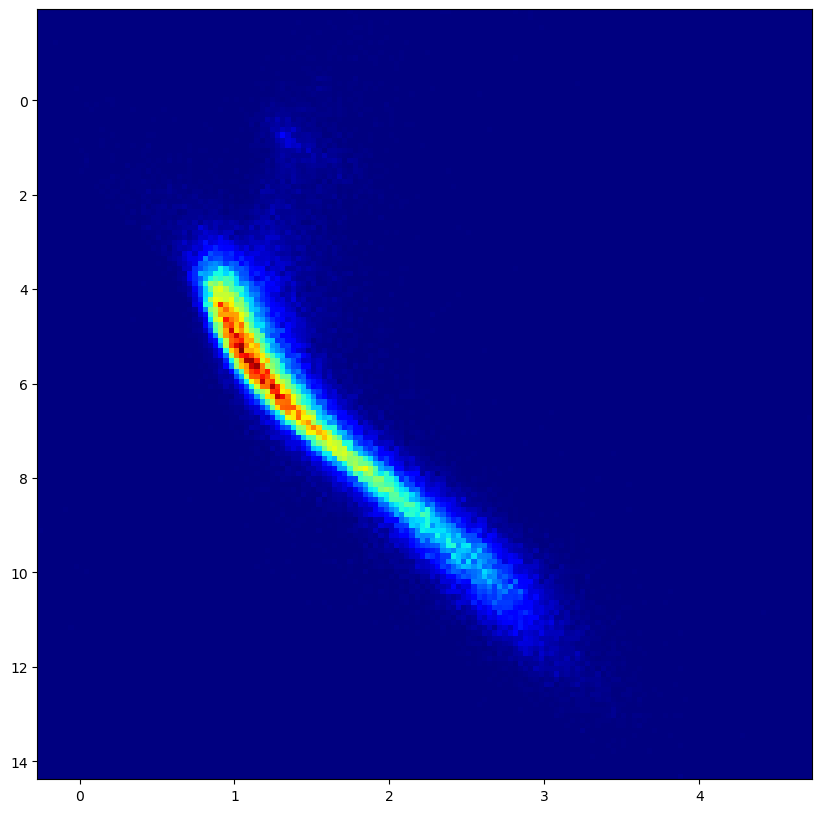

In [7]:
fig, axs = plt.subplots(figsize=(10,10))
axs.hist2d(x, y, bins=(150, 150), cmap='jet')
axs.invert_yaxis()
plt.show()